In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
df = pd.read_csv(r"C:\Users\malig\Desktop\SuperStoreOrders.csv")




In [13]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [27]:
# Grupla
market_sales_profit = df.groupby('market')[['sales', 'profit']].sum().reset_index()
market_sales_profit = market_sales_profit.sort_values(by='sales', ascending=False)
print(market_sales_profit)



   market                                              sales        profit
3    EMEA  6666712352624717174263635891421551565342371111...   43897.97100
4      EU  458541402717207903247163315559871162061,384268...  372829.74150
1  Africa  408811562825645912,47959683091715161353177941,...   88871.63100
2  Canada  3141627737973057551246493301212601705312381504...   17817.39000
5   LATAM  1951,648223186149166743838393,0294319397504251...  221643.48708
6      US  16273124202,574610392756191331757710319523101,...  286397.02170
0    APAC  1201145527691233821119315969691353662749509041...  437577.57900


ValueError: Image size of 259867x545 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>

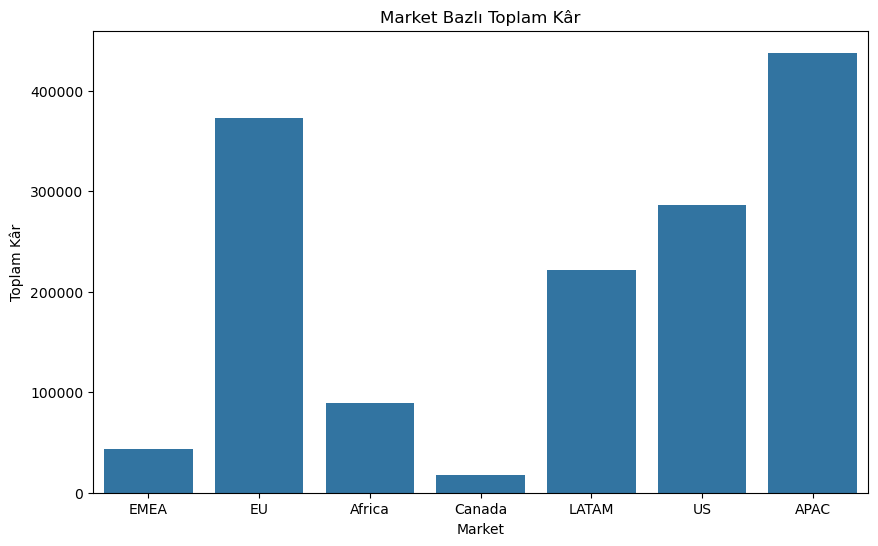

In [29]:

plt.figure(figsize=(10, 6))
sns.barplot(data=market_sales_profit, x='market', y='sales')
plt.title('Market Bazlı Toplam Satış')
plt.xlabel('Market')
plt.ylabel('Toplam Satış')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=market_sales_profit, x='market', y='profit')
plt.title('Market Bazlı Toplam Kâr')
plt.xlabel('Market')
plt.ylabel('Toplam Kâr')
plt.show()




In [32]:
subcat_profit = df.groupby('sub_category')['profit'].sum().reset_index()


In [38]:
loss_subcats = subcat_profit[subcat_profit['profit'] < 0]
print(loss_subcats)


   sub_category      profit
16       Tables -64083.3887


C:\Users\malig\AppData\Local\Temp\ipykernel_14480\4115609697.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loss_subcats, x='sub_category', y='profit', palette='Reds_r')


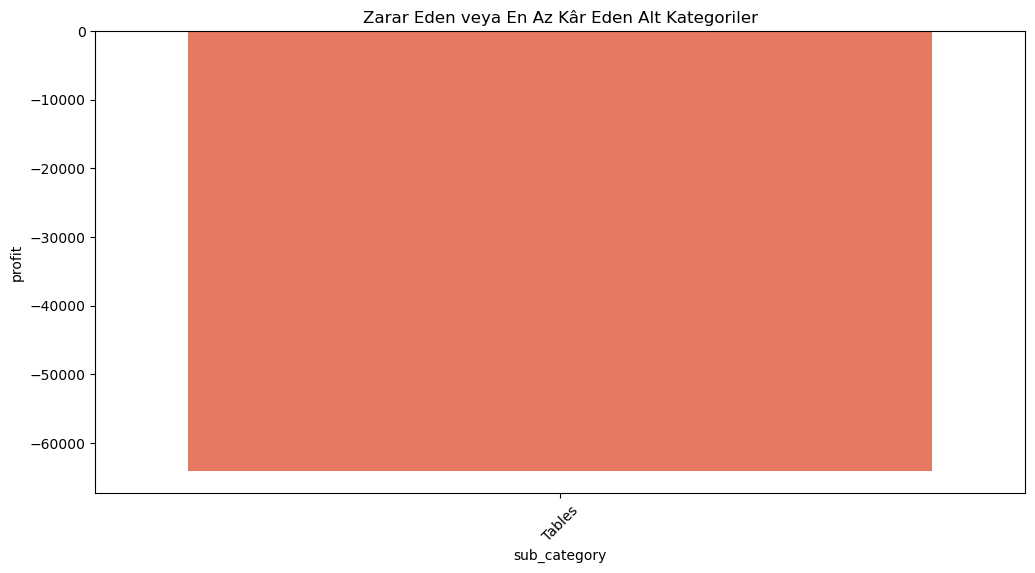

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(data=loss_subcats, x='sub_category', y='profit', palette='Reds_r')
plt.title('Zarar Eden veya En Az Kâr Eden Alt Kategoriler')
plt.xticks(rotation=45)
plt.show()
